In [1]:
import numpy as np
import csv
import matplotlib.pyplot as plt

In [2]:
class KalmanFilter():
    def __init__(self, F, H, B=None, R=None, P=None, x0=None):
        self.n = F.shape[1]
        self.m = H.shape[1]

        self.F = F
        self.H = H
        if B is None:
            self.B = 0  
        else:
            self.B = B
            
        if R is None:
            self.R = np.eye(self.n)
        else:
            self.R = R
            
        if P is None:
            self.P = np.eye(self.n) * 1000
        else:
            self.P = P
        
        if x0 is None:
            self.x = np.zeros((self.n, 1)) 
        else:
            self.x = x0

    def predict(self):
        self.x = np.dot(self.F, self.x)
        self.P = np.dot(np.dot(self.F, self.P), self.F.T) + self.B
        return self.x

    def update(self, z):
        y = z - np.dot(self.H, self.x)
        S = np.dot(self.H, np.dot(self.P, self.H.T)) + self.R
        K = np.dot(np.dot(self.P, self.H.T), np.linalg.inv(S))
        self.x = self.x + np.dot(K, y)
        I = np.eye(self.n)
        self.P = np.dot(I - np.dot(K, self.H), self.P)

In [3]:
# init parameters
dt = 1 # observation interval
F = np.array([[1, dt, 0, 0], [0, 1, 0, 0], [0,0,1,dt], [0,0,0,1]]).reshape(4, 4)
H = np.array([[1, 0, 0, 0],[0,0,0,0], [0, 0, 1, 0], [0,0,0,0]]).reshape(4, 4)
B = np.random.rand() * 0.001

kf = KalmanFilter(F, H, B=B)

In [4]:
# load csv for pb2
with open('pb2.csv') as csv_file:
    file_reader = csv.reader(csv_file)
    obs2 = []
    for i in file_reader:
        obs2.append(i)


obs_2obj = [float(elem) for elem in obs2[0]]
obs_2obj = np.array(obs_2obj).reshape(-1, len(obs_2obj)//2)

In [5]:
# apply kalman filter and predict
preds = []
measeure = []
for idx in range(obs_2obj.shape[1]):
    tmp_ob = obs_2obj[:, idx]
    measeure.append(tmp_ob)
    preds.append((np.dot(H, kf.predict())[0][0], np.dot(H, kf.predict())[2][0]))
    kf.update(np.array([tmp_ob[0], kf.x[1][0], tmp_ob[1], kf.x[3][0]]).reshape(4,1))

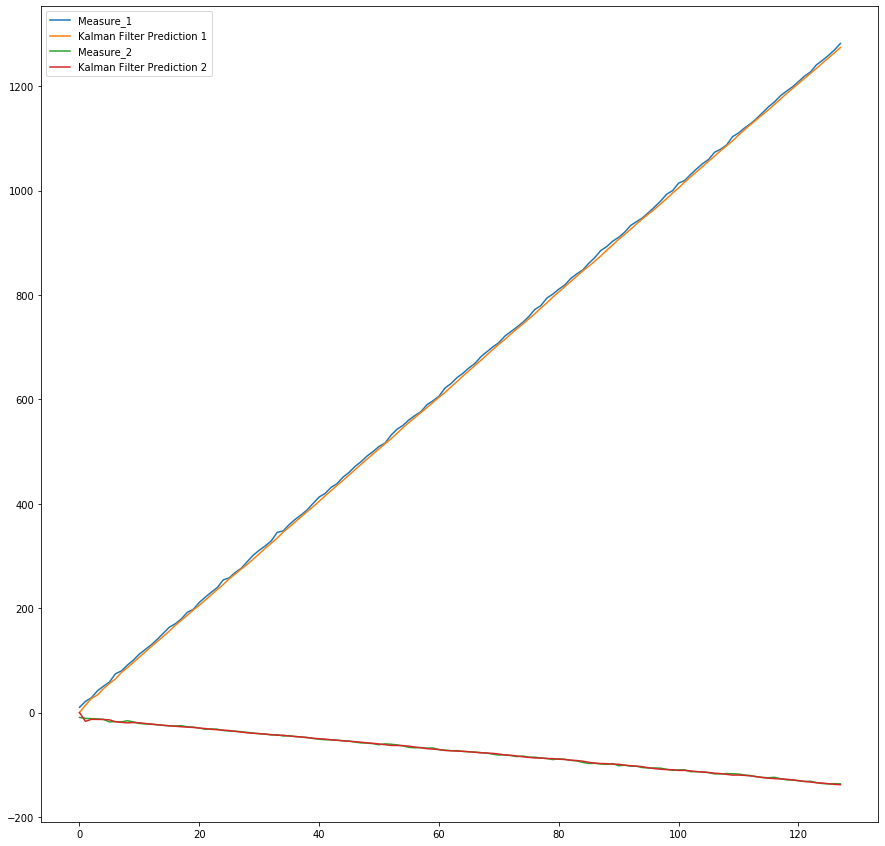

In [6]:
measeure = np.array(measeure)
preds = np.array(preds)

plt.figure(figsize=(15,15))
plt.plot(range(len(measeure[:, 0])), measeure[:, 0], label='Measure_1')
plt.plot(range(len(preds[:, 0])), preds[:, 0], label='Kalman Filter Prediction 1')
plt.plot(range(len(measeure[:, 1])), measeure[:, 1], label='Measure_2')
plt.plot(range(len(preds[:, 1])), preds[:, 1], label='Kalman Filter Prediction 2')
plt.legend()
plt.show()